In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [3]:
#Loading the dataset
data=pd.read_csv('Micro_credit.csv',parse_dates=['pdate'])
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
#Checking the columns
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#Dropping Unnamed column because it has no use in our dataset.
df=data.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
#Checking the shape of the dataset
df.shape

(209593, 36)

In [7]:
#Checking the datatype of the columns
df.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

In [8]:
#Checking the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

### To Check the missing values

In [9]:
df.isnull().values.any()

False

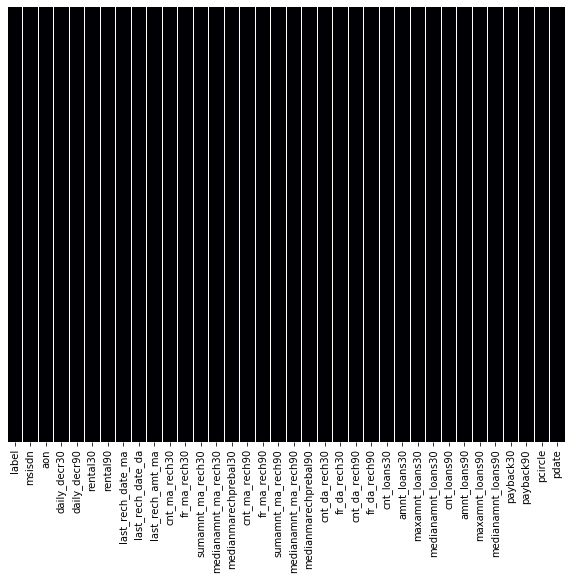

In [10]:
#Seeing the null values via visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')
plt.show()

## Summary Statistics

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [12]:
#Here we check the summary of object and datetime columns
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq,first,last
msisdn,209593,186243,47819I90840,7,NaT,NaT
pcircle,209593,1,UPW,209593,NaT,NaT
pdate,209593,82,2016-07-04 00:00:00,3150,2016-06-01,2016-08-21


In [13]:
#Deleting the duplicates entry in msidn column
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 36)

## Data Exploration

In [14]:
#Printing the object datatypes and their unique values.

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print('**********************************************************************************************************')
        print('\n')

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
**********************************************************************************************************


pcircle : ['UPW']
**********************************************************************************************************




In [15]:
#Creating the copy of the dataset.
df1=df.copy()

#Dropping the pcircle column.
df.drop(columns=['pcircle'],axis=1,inplace=True)

In [16]:
#Printing the float datatype columns and number of unique values in the particular columns.

for column in df.columns:
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].nunique())
        print('*******************************************************************************')

aon : 4282
4282
*******************************************************************************
daily_decr30 : 130324
130324
*******************************************************************************
daily_decr90 : 139843
139843
*******************************************************************************
rental30 : 117881
117881
*******************************************************************************
rental90 : 125595
125595
*******************************************************************************
last_rech_date_ma : 1061
1061
*******************************************************************************
last_rech_date_da : 1061
1061
*******************************************************************************
fr_ma_rech30 : 961
961
*******************************************************************************
sumamnt_ma_rech30 : 13130
13130
*******************************************************************************
medianamnt_ma_rech30 : 501
501
**********

In [17]:
#Checking the number of number of defaulter and non defaulter customers.
df['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

In [18]:
#Checking the defaulter customers percentage wise.
df['label'].value_counts(normalize=True) *100

1    86.114914
0    13.885086
Name: label, dtype: float64

## To Check the correlation

In [19]:
df_cor = df.corr()
df_cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,0.001129,0.207727,0.149780,-0.004835,0.245941,0.094709,0.212666,0.129527,0.041728,0.004184,-0.000137,0.003601,-0.005779,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,-0.000436,-0.000397,0.004446,0.004221,-0.003957,0.005517,0.000160,0.005022,-0.001128,0.002445,0.000806,0.000868,0.006379,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,0.000766,0.630202,0.307440,-0.000854,0.576787,-0.061858,0.754042,0.269721,0.042276,0.000312,-0.002442,0.038944,0.019874,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,0.001091,0.597542,0.294838,-0.000688,0.582115,-0.063740,0.759865,0.262627,0.041210,-0.000128,-0.002189,0.031408,0.015944,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,0.000272,0.258656,0.132083,-0.001112,0.295746,-0.022353,0.324302,0.113115,0.029945,-0.001286,-0.001917,0.073169,0.047579,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,0.001057,0.246626,0.122747,-0.001047,0.329330,-0.024882,0.342772,0.106832,0.032886,-0.001307,-0.001997,0.057332,0.037829,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,-0.001165,0.002544,-0.002716,0.004216,0.006131,0.000881,0.002345,-0.001947,-0.001506,-0.003344,-0.003469,-0.003700,-0.002232,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,0.000958,0.000080,0.000184,0.003673,0.001924,0.001071,-0.000296,-0.000321,0.004731,-0.003807,0.000455,-0.001229,0.000210,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,0.002998,0.456707,0.796969,-0.002597,0.028202,0.109126,0.436776,0.824654,0.125195,-0.002644,-0.003196,0.015274,0.016371,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,0.002295,0.646356,0.002987,0.000556,0.884131,-0.130383,0.572447,-0.039974,0.018759,0.003369,-0.000292,0.011810,0.005453,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


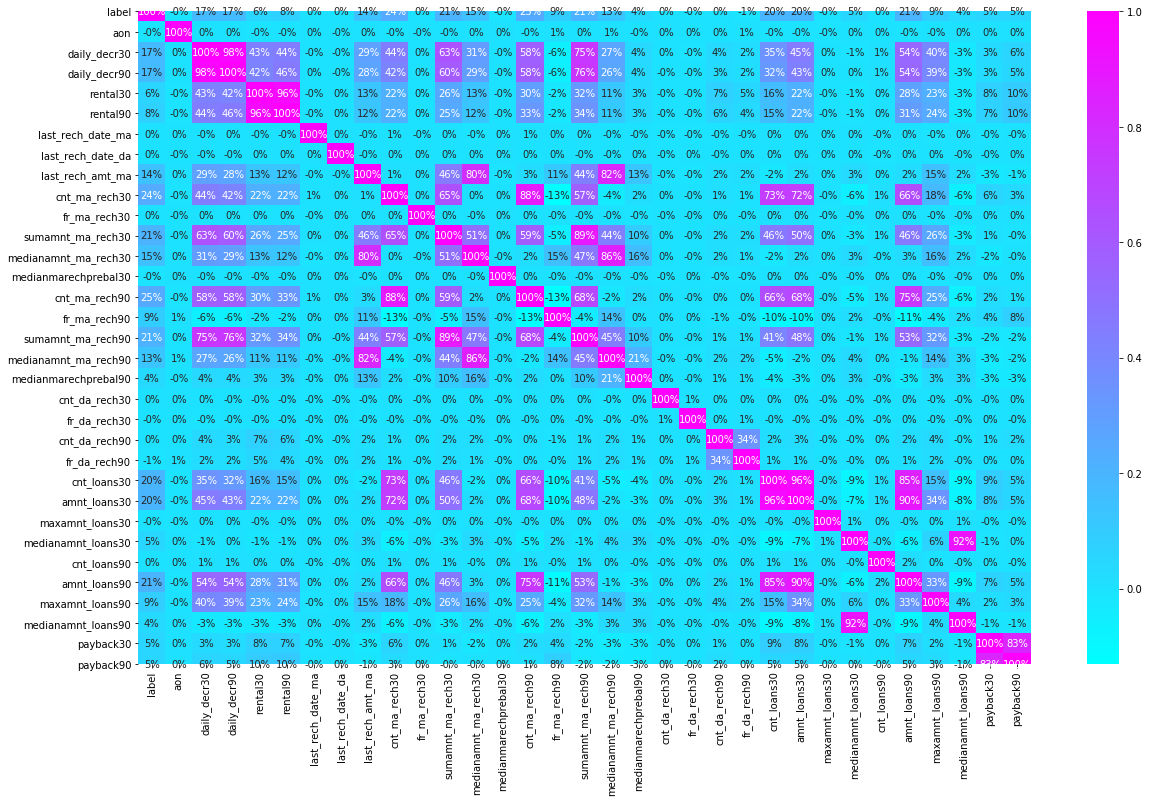

In [20]:
#Seeing the correlation via visualization
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='cool')
plt.show()

In [21]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

In [22]:
#Now checking the shape
df.shape

(186243, 31)

In [23]:
#Checking the unique value in pdate column.
df['pdate'].nunique()

82

In [24]:
#Making the new column Day, Month and year from pdate column
df['Day']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['Month']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['Year']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [25]:
df.head(2)

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Day,Month,Year
0,0,21408I70789,272.0,3065.15,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,2.0,12,6,0.0,29.0,29.0,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12124.75,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,1.0,12,12,0.0,0.0,0.0,2016-08-10,10,8,2016


In [26]:
#Checking the number of months 
df['Month'].unique()

array([7, 8, 6], dtype=int64)

In [27]:
#After fetching the data from pdate column now we are going to drop it because it has not any significant role.
df.drop(columns=['pdate'],axis=1, inplace = True)

In [28]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 33
>>> Number of categorical features:: 1
>>> Number of Numerical Feature:: 32


## Data Visualization

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

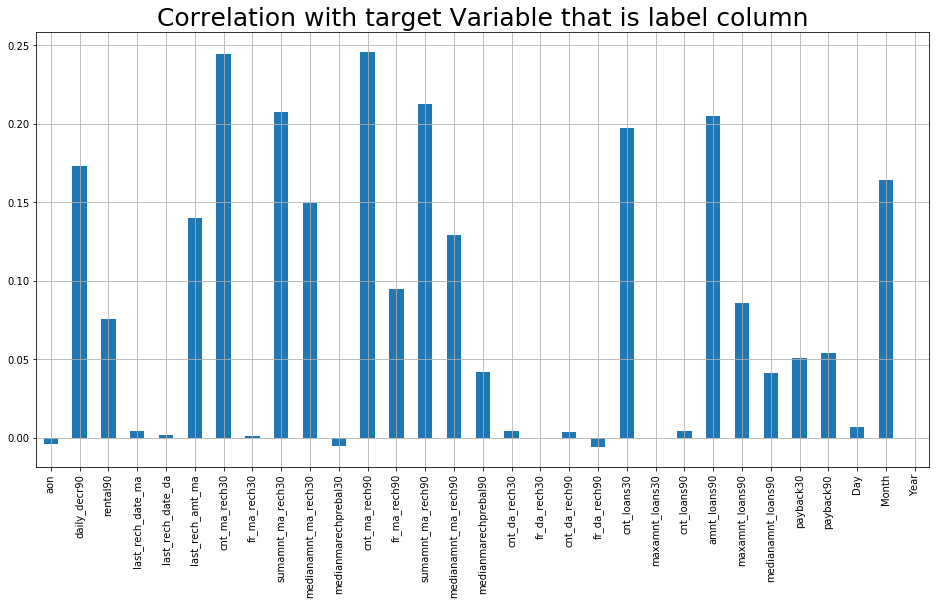

In [29]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

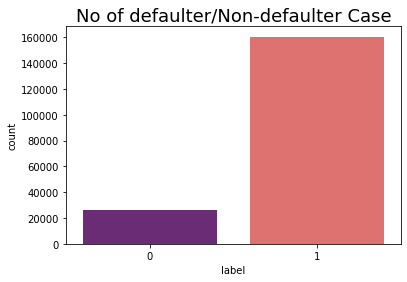

1    160383
0     25860
Name: label, dtype: int64


In [30]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

Observation:
    
    Label 1 indicates loan has been payed i.e Non-Defaulter and label 0 indicates indicates that the loan has not been 
    payed i.e. defaulter.

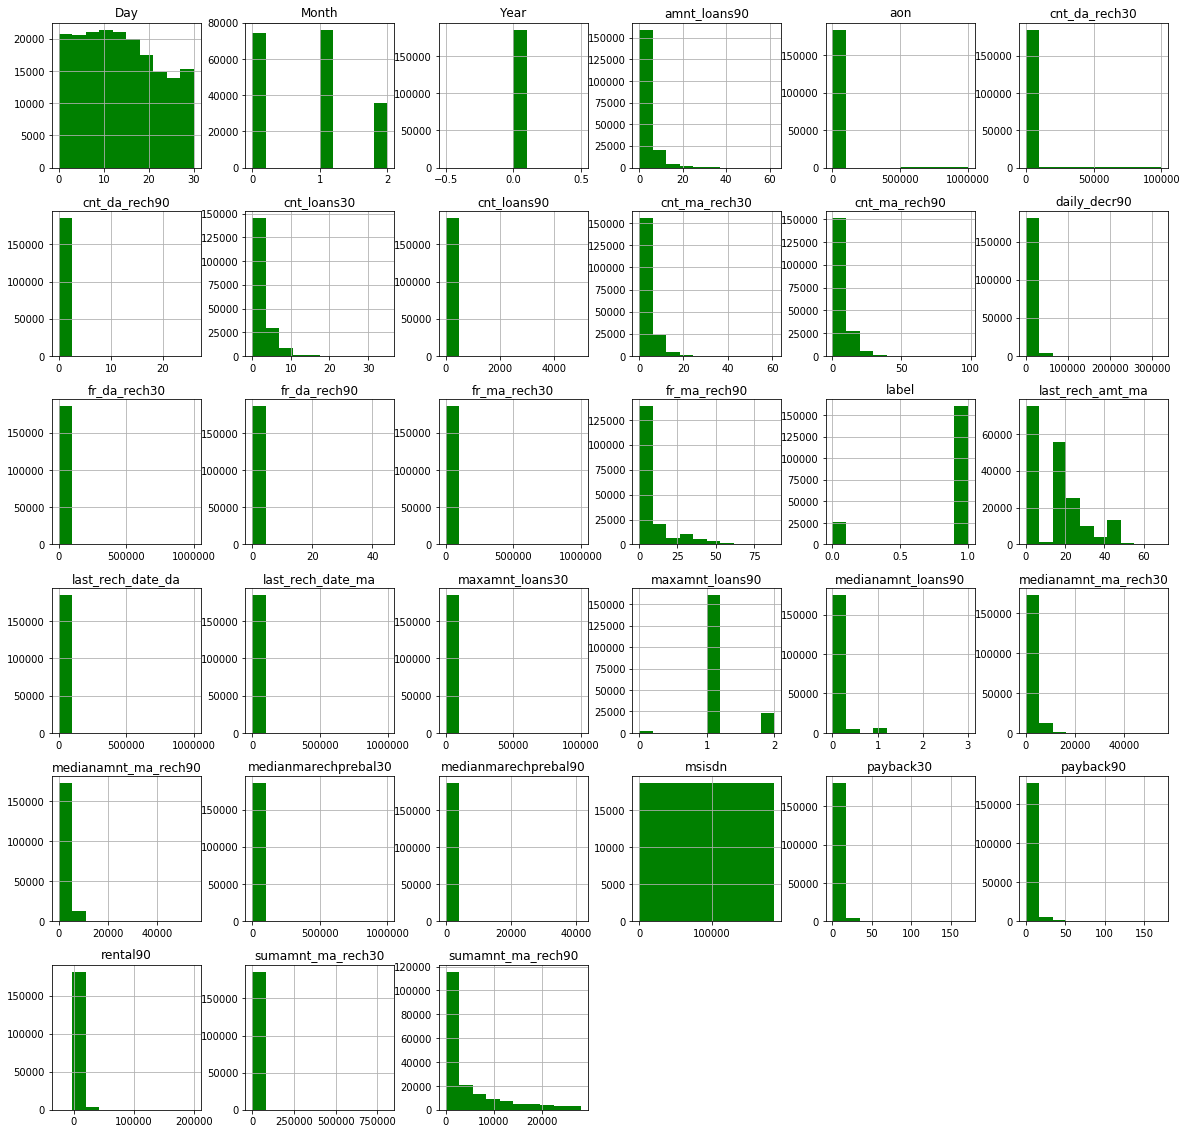

In [99]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='g')
plt.show()

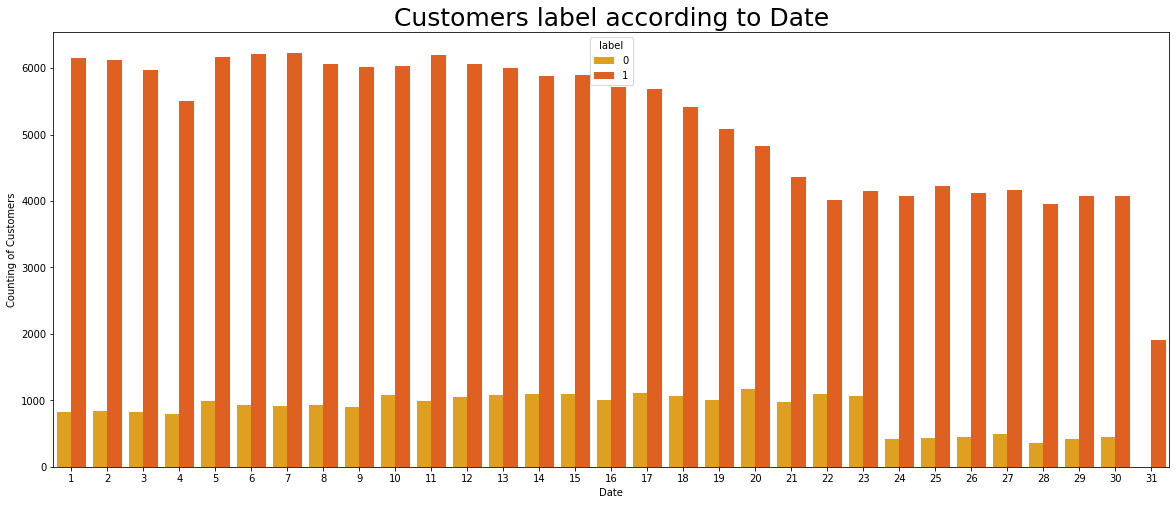

In [32]:
#Customer label according to Date
plt.figure(figsize=(20,8))
sns.countplot(x="Day", hue='label', data=df, palette='autumn_r')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()

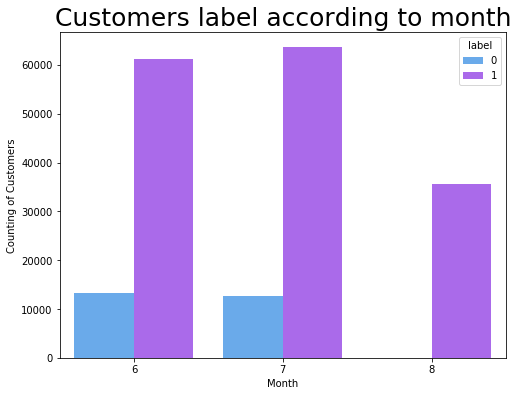

In [33]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="Month", hue='label', data=df, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

## Checking the skewness

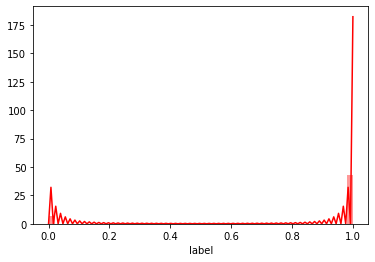

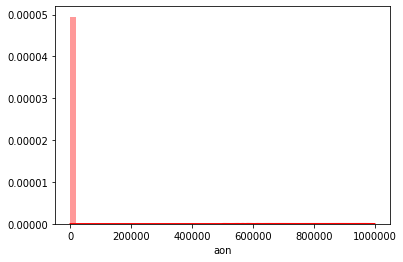

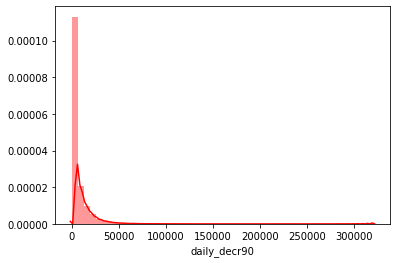

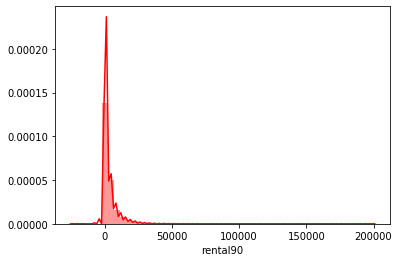

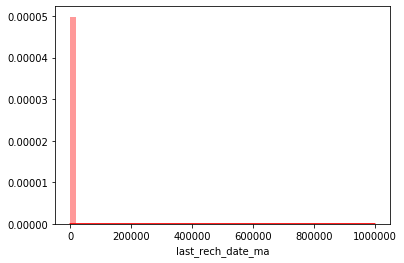

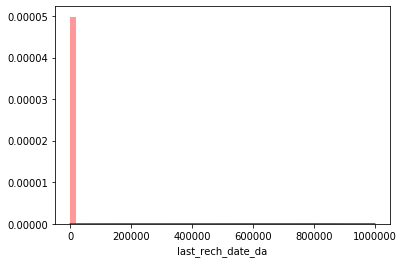

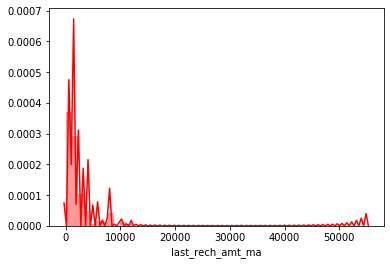

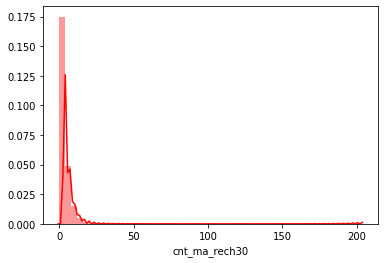

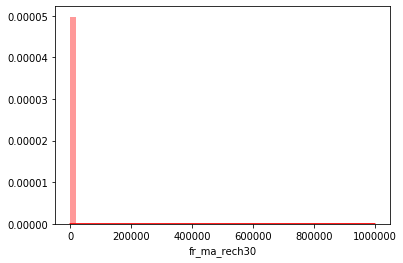

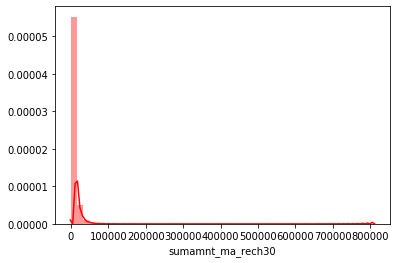

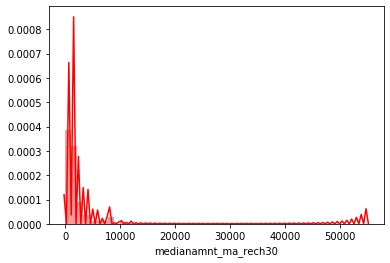

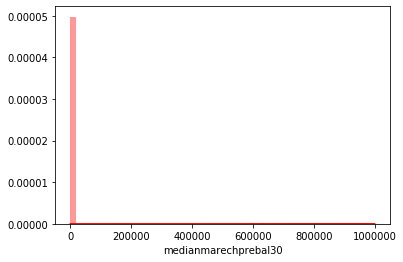

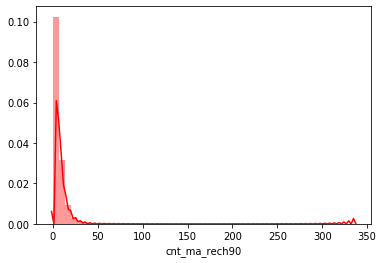

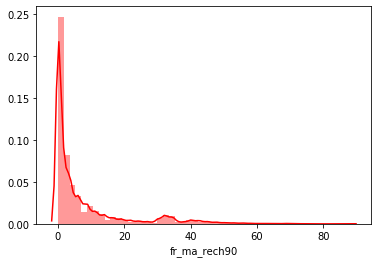

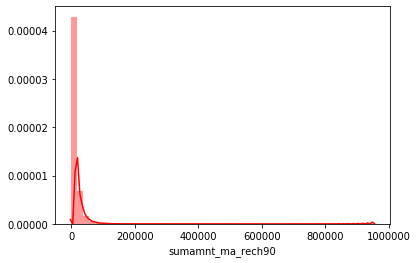

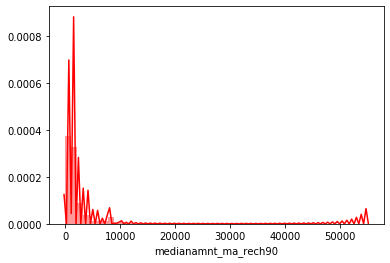

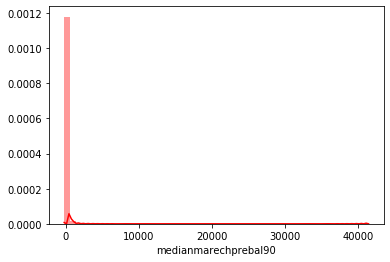

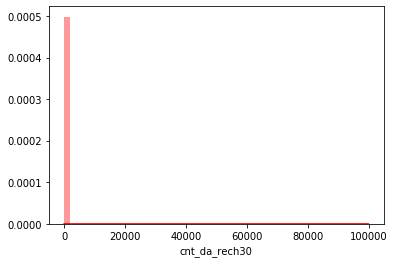

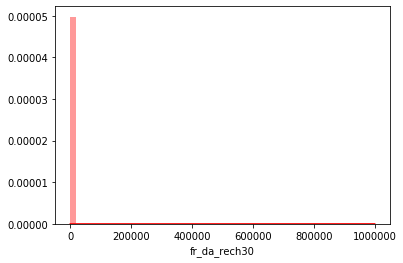

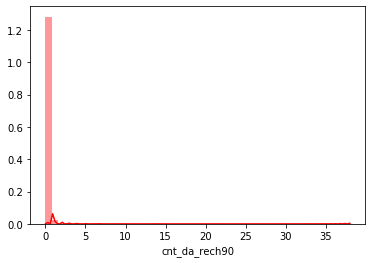

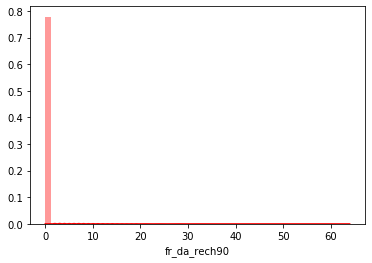

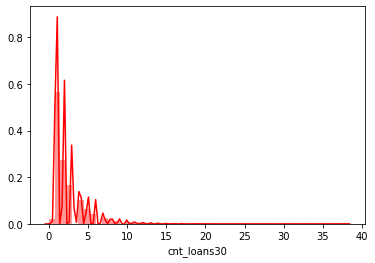

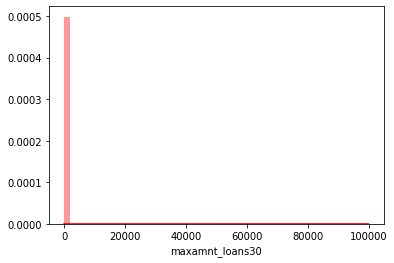

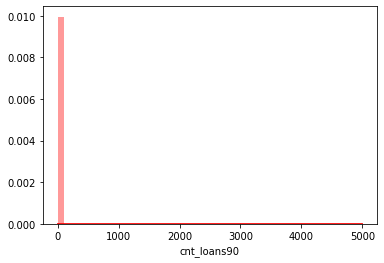

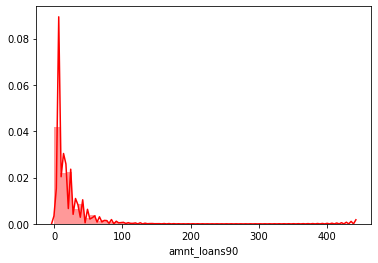

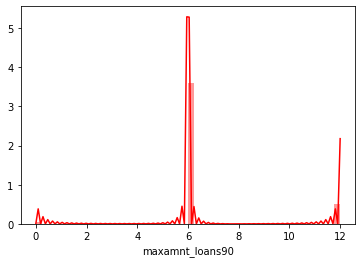

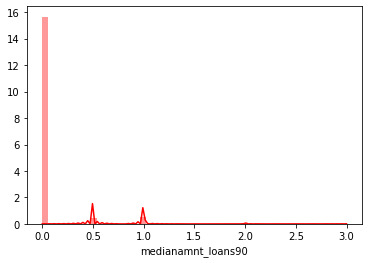

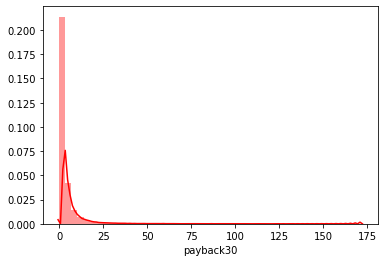

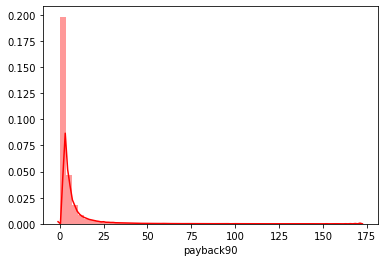

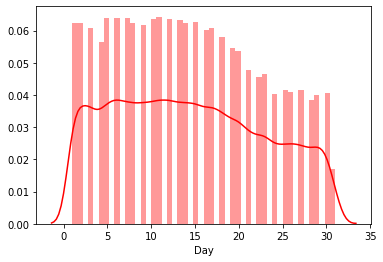

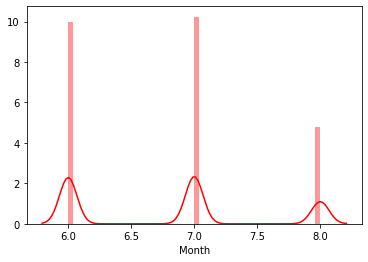

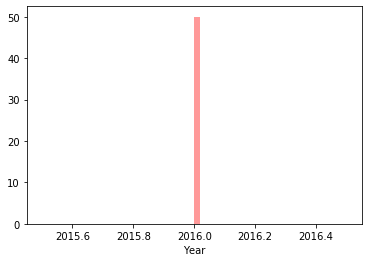

In [34]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [35]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr90             4.301490
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
maxamnt_loans30         17.718074
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans90          1.650198
medianamnt_loans90       4.774958
payback30                8.193009
payback90                6.763241
Day           

In [38]:
df.isnull().values.any()

False

## Plotting Outliers

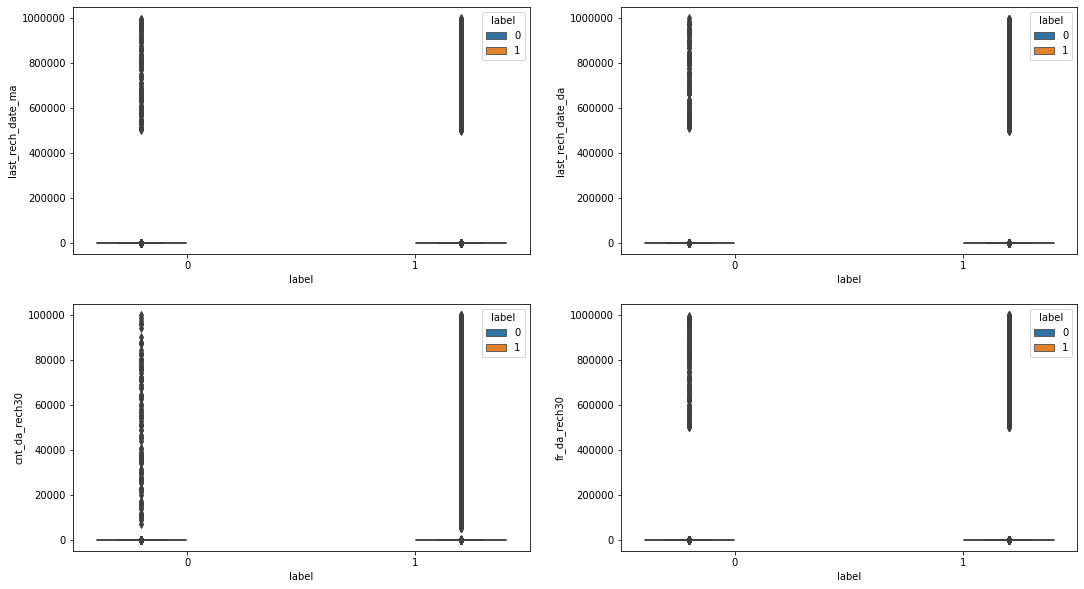

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'label', y = 'last_rech_date_ma', hue = 'label', data = df)
sns.boxplot(ax=ax2, x = 'label', y = 'last_rech_date_da', hue = 'label', data = df)
sns.boxplot(ax=ax3, x = 'label', y = 'cnt_da_rech30', hue = 'label', data = df)
sns.boxplot(ax=ax4, x = 'label', y = 'fr_da_rech30', hue = 'label', data = df)

## Removing Outliers

In [40]:
#Creating a copy of our dataset
df2=df1.copy()
#Dropping the object columns
df1.drop(columns=['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [41]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[2.49037591, 0.10377791, 0.22775491, ..., 0.234897  , 2.83579276,
        2.32325254],
       [0.40154581, 0.09797818, 0.80746584, ..., 0.234897  , 0.37055804,
        0.40750695],
       [0.40154581, 0.10031125, 0.41694891, ..., 0.234897  , 0.37055804,
        0.40750695],
       ...,
       [0.40154581, 0.10203799, 0.55922577, ..., 0.234897  , 0.25999422,
        0.31334283],
       [0.40154581, 0.08453335, 0.84928003, ..., 0.234897  , 0.37055804,
        0.58121631],
       [0.40154581, 0.08652371, 0.06399206, ..., 0.234897  , 0.37055804,
        0.40750695]])

In [43]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 186234, 186239, 186239], dtype=int64), array([15, 15, 32, ...,  3, 26, 30], dtype=int64))


In [44]:
df1_new=df1[(z<3).all(axis=1)]

In [45]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(186243, 33) 		 (143188, 33)


## Converting the categorical data into numeric variables

In [46]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [47]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
0,0,40191,272.0,3065.150000,260.13,2.0,0.0,14,2,21.0,3078.0,1539.0,7.50,2,21,163,1539.0,7.50,0.0,0.0,0,0,2,6.0,2.0,2,1,0.0,29.000000,29.000000,19,1,0
1,1,142291,712.0,12124.750000,3691.26,20.0,0.0,38,1,0.0,5787.0,5787.0,61.04,1,0,854,5787.0,61.04,0.0,0.0,0,0,1,12.0,1.0,2,2,0.0,0.000000,0.000000,9,2,0
2,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,1539.0,1539.0,66.32,1,0,30,1539.0,66.32,0.0,0.0,0,0,1,6.0,1.0,1,1,0.0,0.000000,0.000000,18,2,0
3,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,0.0,0.0,0.00,1,0,14,947.0,2.50,0.0,0.0,0,0,2,6.0,2.0,2,1,0.0,0.000000,0.000000,5,0,0
4,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,20029.0,2309.0,29.00,8,2,12128,2888.0,35.00,0.0,0.0,0,0,7,6.0,7.0,7,1,0.0,2.333333,2.333333,21,0,0


## Feature importances

In [48]:
#Splitting the data into x and y
x = df.drop(['label'], axis=1)

y = df['label']

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=3)

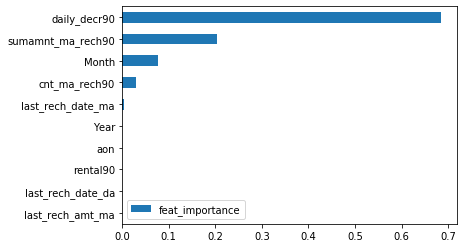

In [50]:
dt_features = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_features.sort_values('feat_importance').tail(10).plot.barh()
plt.show()

# Model Training

In [51]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(186243, 32) 		 (186243,)


In [52]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [53]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [54]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(148994, 32) 		 (37249, 32)


In [55]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(148994,) 	 (37249,)


# Logistic Regression

### Cross Validation like KFold and Hyperparameter tunning

In [56]:
#Importing the model Library
from sklearn.linear_model import LogisticRegression

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, KFold

In [57]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=15,random_state=None,shuffle=False)

In [58]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [59]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  288  4884]
 [  172 31905]]
0.8642648124781873
              precision    recall  f1-score   support

           0       0.63      0.06      0.10      5172
           1       0.87      0.99      0.93     32077

    accuracy                           0.86     37249
   macro avg       0.75      0.53      0.51     37249
weighted avg       0.83      0.86      0.81     37249



## RandomForest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2691  2481]
 [  704 31373]]
0.9144943488415797
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      5172
           1       0.93      0.98      0.95     32077

    accuracy                           0.91     37249
   macro avg       0.86      0.75      0.79     37249
weighted avg       0.91      0.91      0.91     37249



## Under Sampling

By using the under sampling  we are trying to reduce the points of maximum labels.

In [62]:
from collections import Counter
Counter(y_train)

Counter({0: 20688, 1: 128306})

In [63]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [64]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(.8)
x_train_ns,y_train_ns = ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 128306, 0: 20688})
The number of classes after fit Counter({1: 25860, 0: 20688})


In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [66]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4095  1077]
 [21822 10255]]
0.38524524148299283
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      5172
           1       0.90      0.32      0.47     32077

    accuracy                           0.39     37249
   macro avg       0.53      0.56      0.37     37249
weighted avg       0.80      0.39      0.44     37249



# Over Sampling

By using the over sampling we are trying to increase the points of minimum labels.

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 128306, 0: 20688})
The number of classes after fit Counter({1: 128306, 0: 96229})


## Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(x_train_os,y_train_os)

RandomForestClassifier()

In [70]:
y_pred=RFclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3042  2130]
 [ 1125 30952]]
0.9126151037611748
              precision    recall  f1-score   support

           0       0.73      0.59      0.65      5172
           1       0.94      0.96      0.95     32077

    accuracy                           0.91     37249
   macro avg       0.83      0.78      0.80     37249
weighted avg       0.91      0.91      0.91     37249



In [71]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred)
print("AUC_Score:",auc_score)

AUC_Score: 0.7765475975117009


## GausianNB

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_os,y_train_os)

GaussianNB()

In [73]:
y_pred=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4541   631]
 [14899 17178]]
0.5830760557330398
              precision    recall  f1-score   support

           0       0.23      0.88      0.37      5172
           1       0.96      0.54      0.69     32077

    accuracy                           0.58     37249
   macro avg       0.60      0.71      0.53     37249
weighted avg       0.86      0.58      0.64     37249



## DecisionTree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_os,y_train_os)

DecisionTreeClassifier()

In [75]:
y_pred_dt=dtc.predict(x_test)
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[ 2758  2414]
 [ 2263 29814]]
0.874439582270665
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      5172
           1       0.93      0.93      0.93     32077

    accuracy                           0.87     37249
   macro avg       0.74      0.73      0.73     37249
weighted avg       0.87      0.87      0.87     37249



## ExtraTrees Classifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_os,y_train_os)

ExtraTreesClassifier()

In [77]:
y_pred_et=etc.predict(x_test)
print(confusion_matrix(y_test,y_pred_et))
print(accuracy_score(y_test,y_pred_et))
print(classification_report(y_test,y_pred_et))

[[ 2620  2552]
 [  811 31266]]
0.909715697065693
              precision    recall  f1-score   support

           0       0.76      0.51      0.61      5172
           1       0.92      0.97      0.95     32077

    accuracy                           0.91     37249
   macro avg       0.84      0.74      0.78     37249
weighted avg       0.90      0.91      0.90     37249



## Bagging Classifier

In [78]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train_os,y_train_os)

BaggingClassifier()

In [79]:
y_pred_bc=bc.predict(x_test)
print(confusion_matrix(y_test,y_pred_bc))
print(accuracy_score(y_test,y_pred_bc))
print(classification_report(y_test,y_pred_bc))

[[ 3332  1840]
 [ 1952 30125]]
0.8981986093586405
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      5172
           1       0.94      0.94      0.94     32077

    accuracy                           0.90     37249
   macro avg       0.79      0.79      0.79     37249
weighted avg       0.90      0.90      0.90     37249



In [80]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_bc)
print("AUC_Score:",auc_score)

AUC_Score: 0.7916923173142855


## Gradient Boosting Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 6, n_estimators = 200)
gbc.fit(x_train_os,y_train_os)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=200)

In [82]:
y_pred_gbc=gbc.predict(x_test)
print(confusion_matrix(y_test,y_pred_gbc))
print(accuracy_score(y_test,y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))

[[ 4035  1137]
 [ 3657 28420]]
0.8712985583505597
              precision    recall  f1-score   support

           0       0.52      0.78      0.63      5172
           1       0.96      0.89      0.92     32077

    accuracy                           0.87     37249
   macro avg       0.74      0.83      0.77     37249
weighted avg       0.90      0.87      0.88     37249



# Using XGBoost Classifier

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [85]:
xgb = XGBClassifier(max_depth=15,
                    subsample= 0.8,
                    n_estimators=400,
                    learning_rate=0.01,
                    min_child_weight=10,
                    reg_alpha=0,
                    reg_lambda=5)
xgb.fit(x_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
y_pred_xgb=xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[ 3993  1179]
 [ 2829 29248]]
0.8923997959676769
              precision    recall  f1-score   support

           0       0.59      0.77      0.67      5172
           1       0.96      0.91      0.94     32077

    accuracy                           0.89     37249
   macro avg       0.77      0.84      0.80     37249
weighted avg       0.91      0.89      0.90     37249



In [87]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_xgb)
print("AUC_Score:",auc_score)

AUC_Score: 0.8419238651166164


If we use GridSearchCV then our models gives better result but this dataset is too large that's why my system takes too much
time to give the result. So for that reason I am not going to use GridSearchCV.

### From above result XGBoost Classifier giving the best AUC Score and recall and f1 score.

# SMOTETomek

It is a method of imblearn. SMOTETomek is a hybrid method which uses on under sampling method (Tomek) in with over sampling 
method (SMOTE).

In [88]:
from imblearn.combine import SMOTETomek

In [89]:
st = SMOTETomek(0.75)
x_train_st,y_train_st = st.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({1: 128306, 0: 20688})
The number of classes after fit Counter({1: 126777, 0: 94700})


In [90]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_st,y_train_st)

RandomForestClassifier()

In [91]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3122  2050]
 [ 1437 30640]]
0.9063867486375473
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      5172
           1       0.94      0.96      0.95     32077

    accuracy                           0.91     37249
   macro avg       0.81      0.78      0.79     37249
weighted avg       0.90      0.91      0.90     37249



# Using XGBoostClassifier

In [92]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=15,
                    subsample= 0.8,
                    n_estimators=400,
                    learning_rate=0.01,
                    min_child_weight=10,
                     random_state = 45,
                    reg_alpha=2,
                    reg_lambda=5)
xgbc.fit(x_train_st,y_train_st)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=45,
              reg_alpha=2, reg_lambda=5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
y_pred_xgbc=xgbc.predict(x_test)
print(confusion_matrix(y_test,y_pred_xgbc))
print(accuracy_score(y_test,y_pred_xgbc))
print(classification_report(y_test,y_pred_xgbc))

[[ 3453  1719]
 [ 1888 30189]]
0.9031651856425675
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5172
           1       0.95      0.94      0.94     32077

    accuracy                           0.90     37249
   macro avg       0.80      0.80      0.80     37249
weighted avg       0.90      0.90      0.90     37249



In [94]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_xgbc)
print("AUC_Score:",auc_score)

AUC_Score: 0.8043875193152903


## Over Sampled Model give the best result.

### The AUC Score,f1-score and recall value is high when we use XGBoost with over sampling data. So we choose  XGBoost model with over sampled data as our final model.

In [95]:
#Finding AUC_Score for XGBoost Classifier

from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_xgb)
print("AUC_Score:",auc_score)

AUC_Score: 0.8419238651166164


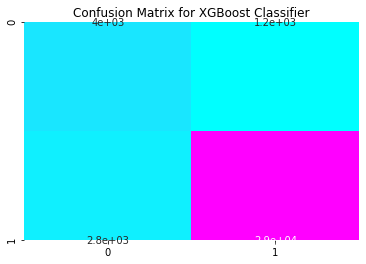

In [96]:
#Plotting Confusion Matrix for XGBoost Classifier.
cm=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm,annot=True,cbar=False,cmap='cool')

plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

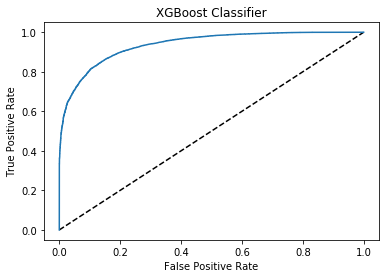

0.8419238651166164


In [97]:
#AUC_ROC Curve of XGBoost Classifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=xgb.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.show()

auc_score=roc_auc_score(y_test,y_pred_xgb)
print(auc_score)

In [98]:
#Saving the model
import joblib

#Save the model as a pickle in a file
joblib.dump(xgb,'Micro_credit.pkl')

['Micro_credit.pkl']